# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

# Stefano Bigoni - 961886
## Exercise 01.1
The pseudo-random generator is tested by making it generate $10^6$ numbers and estimating some of their statistical properties.

### Estimation of the mean value and its error:


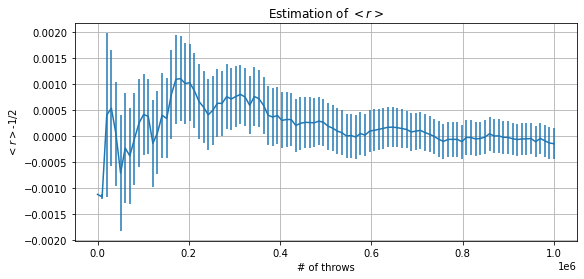

In [54]:
import matplotlib.pyplot as plt
import numpy as np

output = open("output.dat","r")
M = int(output.readline())
output.close()

data = np.loadtxt("output.dat",skiprows=1)

r = data[:,0]
err = data[:,1]

N = np.size(r)

x = np.linspace(1,M,N)

plt.figure(figsize=[9,4])
plt.errorbar(x,r-0.5,yerr=err)
plt.title("Estimation of $<r>$")
plt.xlabel("# of throws")
plt.ylabel("$<r>$-1/2")
plt.grid(True)
plt.show()

The plot above shows that the mean value of the pseudo-randomly generated numbers is compatible with $1/2$, as expected for a uniform distribution in $[0,1]$. There is no clear asymptotic behaviour; however, the calculated values oscillate within 1$\sigma$ of the expected one.

The $10^6$ throws were divided into 100 blocks, therefore using $10^4$ throws per block.

### Estimation of the variance and its error:

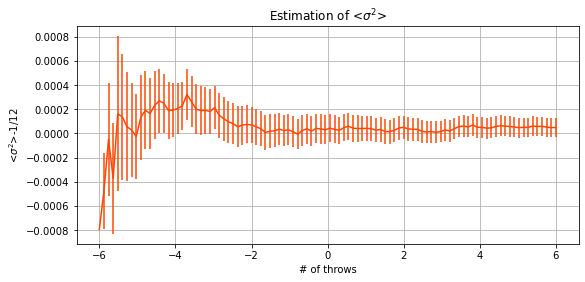

In [52]:
data = np.loadtxt("output2.dat",skiprows=1)

sigma2 = data[:,0]
err_sigma2 = data[:,1]

N = np.size(r)

plt.figure(figsize=[9,4])
plt.errorbar(x,sigma2-1/12,yerr=err_sigma2,color='orangered')
plt.title("Estimation of <$\sigma^2$>")
plt.xlabel("# of throws")
plt.ylabel("<$\sigma^2$>-1/12")
plt.grid(True)
plt.show()

The estimation of the variance reaches a stable behaviour after about $3\cdot 10^5$ throws, oscillating with an amplitude smaller than the error, therefore compatible with the expected value of $1/12$.

### 3. Chi-square test

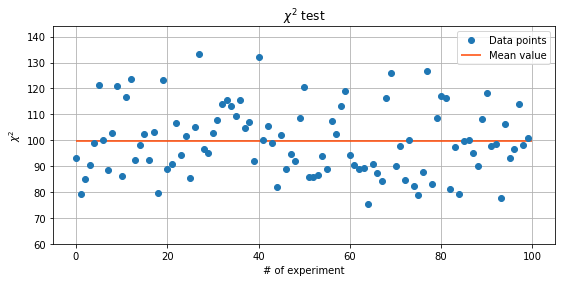

In [51]:
chi2 = np.loadtxt("chi2.dat")
plt.figure(figsize=[9,4])
plt.plot(chi2,'o')
plt.hlines(np.mean(chi2),0,np.size(chi2),'orangered')
plt.grid(True)
plt.ylim([60, 144])

plt.title('$\chi^2$ test')
plt.xlabel('# of experiment')
plt.ylabel('$\chi^2$')
plt.legend(['Data points','Mean value'])
plt.show()

The pseudo-random numbers were divided in $100$ subsets of $10^4$ numbers each, treated as different experiments, then for each experiment the $\chi^2$ for a uniform distribution was estimated dividing the interval $[0,1]$ in 100 bins.

The results are indicating a very small probability for the numbers not being drawn from a uniform distribution: the mean value extracted from all the experiments is remarkably close to 100 (expected for a uniform distribution) and the semi-dispersion is less than half of the mean value. 

## Exercise 01.2
The central limit theorem is tested for the uniform pseudo-random generator studied above and for two diffrently-distributed sets of pseudo-random numbers obtained from the same uniform generator by the method of inversion of the cumulative distribution function. The second set follows an exponential distribution and the third a Cauchy-Lorentz distribution.

By summing successive experiments, the first two are expected to converge to a Gaussian distribution, the third to itself (Cauchy-Lorentz).

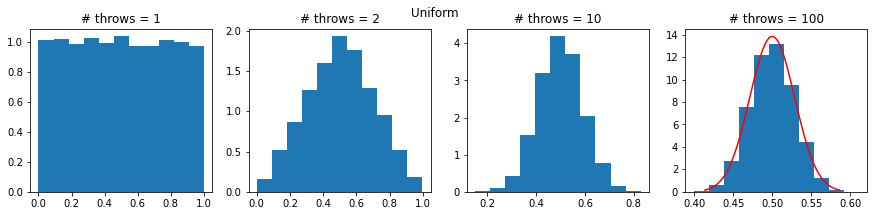

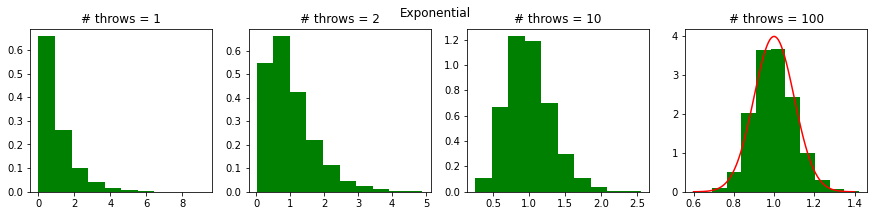

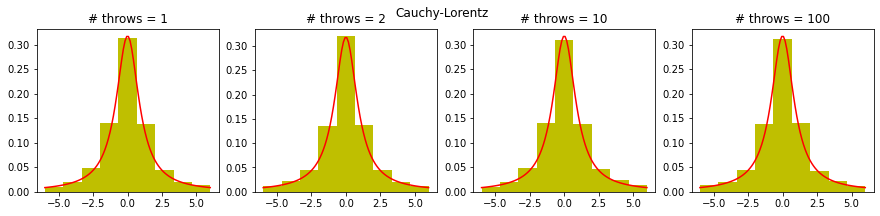

In [50]:
mu = np.loadtxt(fname = "dice_unif.dat")
me = np.loadtxt(fname = "dice_exp.dat")
ml = np.loadtxt(fname = "dice_lor.dat")

no = ['1','2','10','100']

def Gauss(x,mu,sigma):
    return (2*m.pi*sigma**2)**(-0.5)*np.exp(-(x-mu)**2/(2*sigma**2))

fig1 = plt.figure(figsize=(15,3))
fig1.suptitle("Uniform")
for i in np.arange(0,4):
    plt.subplot(1,4,i+1)
    plt.hist(mu[:,i],density=True,bins=11)
    plt.title('# throws = '+no[i])
sigma = np.std(mu[:,0])/10
x = np.linspace(0.5-3*sigma,0.5+3*sigma,100)
plt.plot(x,Gauss(x,0.5,sigma),'r')

fig2 = plt.figure(figsize=(15,3))
fig2.suptitle("Exponential")
for i in np.arange(0,4):
    plt.subplot(1,4,i+1)
    plt.hist(me[:,i],color='green',bins=10, density=True)
    plt.title('# throws = '+no[i])
x = np.linspace(0.6,1.4,100)
plt.plot(x,Gauss(x,1,0.1),'r')

fig3 = plt.figure(figsize=(15,3))
fig3.suptitle("Cauchy-Lorentz")
x = np.linspace(-6,6,100)
for i in np.arange(0,4):
    plt.subplot(1,4,i+1)
    plt.hist(ml[:,i],range=[-6,6],bins=9,color='y',  density=True)
    plt.plot(x,1/m.pi*1/(1+x*x),'r')  
    plt.title('# throws = '+no[i]) 

plt.show()

The results are in accordance to the central limit theorem in all three cases: the first two are reasonably fitted by a gaussian when $100$ dice are thrown, while third case is reasonably fitted by the same Cauchy-Lorentz curve for each of the experiments.

## Exercise 01.3